# Creating Synthetic Digits Dataset

Accuracy: 100.00%
The predicted digit is: 5


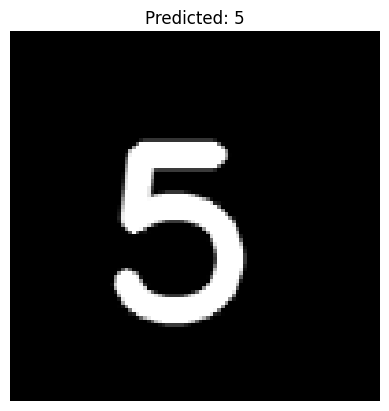

In [1]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

# Create synthetic digits
def create_synthetic_digits():
    dataset = []
    labels = []
    for digit in range(10):
        for _ in range(5):  # 5 samples per digit
            img = np.zeros((100, 100), dtype=np.uint8)
            cv2.putText(img, str(digit), (25, 75), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 5, cv2.LINE_AA)
            dataset.append(img)
            labels.append(digit)
    return np.array(dataset), np.array(labels)

# Template Matching Feature Extraction
def extract_features(images, templates):
    features = []
    for img in images:
        scores = [cv2.matchTemplate(img, templates[d], cv2.TM_CCOEFF_NORMED).max() for d in range(10)]
        features.append(scores)
    return np.array(features)

# Manual KNN Function
def knn_manual(X_train, y_train, X_test, k=3):
    predictions = []
    for test_vector in X_test:
        # Compute distances from test_vector to all training vectors
        distances = [np.linalg.norm(test_vector - train_vector) for train_vector in X_train]
        # Sort distances and get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get labels of k nearest neighbors
        k_labels = [y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return np.array(predictions)

# Main code
if __name__ == "__main__":
    # Step 1: Create synthetic digits
    images, labels = create_synthetic_digits()

    # Step 2: Use first image of each digit as template
    templates = {digit: images[labels == digit][0] for digit in range(10)}

    # Step 3: Extract features
    features = extract_features(images, templates)

    # Step 4: Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Step 5: Predict using manual KNN
    k = 3
    predictions = knn_manual(X_train, y_train, X_test, k)

    # Step 6: Evaluate accuracy
    accuracy = np.mean(predictions == y_test)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Step 7: Test a specific example
    test_image = images[labels == 5][1]
    test_scores = [cv2.matchTemplate(test_image, templates[d], cv2.TM_CCOEFF_NORMED).max() for d in range(10)]
    predicted_digit = knn_manual(X_train, y_train, [test_scores], k)[0]

    print(f'The predicted digit is: {predicted_digit}')

    plt.imshow(test_image, cmap='gray')
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis('off')
    plt.show()

# Reading Images From Manual Created Dataset

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Template matching function
def template_matching(template, image):
    """
    Perform template matching. Since the template and image are the same size,
    this function computes the similarity directly.
    """
    result = cv2.matchTemplate(image, template, method=cv2.TM_CCOEFF_NORMED)
    return result[0][0]  # Correlation coefficient value

# Step 1: Load images and labels from the dataset
def load_images_and_labels():
    images = []  # List to store images
    labels = []  # List to store corresponding labels

    # Example: Assuming the images are named as '0_1.png', '0_2.png', ..., '9_5.png'
    for digit in range(10):  # Loop through digit classes (0-9)
        for i in range(1, 6):  # Assuming 5 images per digit
            image_path = f"digits/{digit}_{i}.png"  # Replace with your dataset path
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(digit)
    return np.array(images), np.array(labels)

# Step 2: Extract features using template matching
def extract_features_with_template_matching(images, templates):
    features = []
    for image in images:
        template_scores = []
        for template in templates:
            # Compute similarity with each template
            score = template_matching(template, image)
            template_scores.append(score)
        features.append(template_scores)
    return np.array(features)

# Step 5: Manual k-NN implementation
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_sample in X_test:
        # Compute distances between the test sample and all training samples
        distances = np.linalg.norm(X_train - test_sample, axis=1)
        # Get the indices of the k nearest neighbors
        k_neighbors = np.argsort(distances)[:k]
        # Get the labels of the k nearest neighbors
        k_labels = y_train[k_neighbors]
        # Predict the most common label among neighbors
        predicted_label = np.bincount(k_labels).argmax()
        predictions.append(predicted_label)
    return np.array(predictions)

# Main code
if __name__ == "__main__":
    # Step 1: Load images and labels
    images, labels = load_images_and_labels()

    # Step 2: Create templates (use the first image of each class as the template)
    templates = []
    for digit in range(10):
        # Select the first image for each class as the template
        templates.append(images[labels == digit][0])

    # Step 3: Extract features using template matching
    features = extract_features_with_template_matching(images, templates)

    # Step 4: Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Step 5: Train and test using manual k-NN
    k = 3  # Number of neighbors for k-NN
    predictions = knn_predict(X_train, y_train, X_test, k)

    # Step 6: Evaluate accuracy
    accuracy = np.mean(predictions == y_test)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Step 7: Visualize a test image and prediction
    test_image = images[0]  # Example test image
    actual_label = labels[0]
    predicted_label = knn_predict(X_train, y_train, [features[0]], k)[0]
    plt.imshow(test_image, cmap="gray")
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis("off")
    plt.show()